In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [210]:
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [211]:
url = "https://raw.githubusercontent.com/goitacademy/DEEP-LEARNING-FOR-COMPUTER-VISION-AND-NLP/main/data/Module_1_Lecture_2_Class_Spaceship_Titanic.csv"

df = pd.read_csv(url)
df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [212]:
df = df.set_index('PassengerId')
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


### EDA

In [214]:
target = 'Transported'
features = [col for col in df.columns if col != target]

In [215]:
text_features = ["Cabin", "Name"]
cat_features = [col for col in features if df[col].nunique() < 25 and col not in text_features ]
cont_features = [col for col in features if df[col].nunique() >= 25 and col not in text_features ]

print(f'Number of categorical features: {len(cat_features)}')
print('Categorical features:', cat_features, '\n')
print(f'Number of continuos features: {len(cont_features)}')
print('Continuos features:', cont_features, '\n')
print(f'Number of text features: {len(text_features)}')
print('Text features:', text_features)

Number of categorical features: 4
Categorical features: ['HomePlanet', 'CryoSleep', 'Destination', 'VIP'] 

Number of continuos features: 6
Continuos features: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] 

Number of text features: 2
Text features: ['Cabin', 'Name']


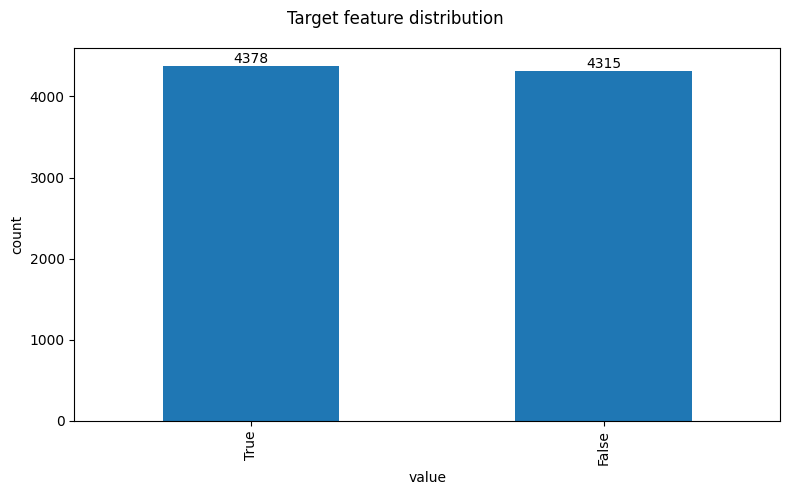

In [216]:
ax = df[target].value_counts().plot(kind='bar', figsize=(8, 5))
# for i in ax.containers:
ax.bar_label(ax.containers[0])
ax.set_xlabel("value")
ax.set_ylabel("count")

plt.suptitle("Target feature distribution")

plt.tight_layout()
plt.show()


Ми бачимо, що цільова функція розподілена рівномірно. Це означає, що ми можемо використовувати accuracy як метрику оцінки якості моделі.

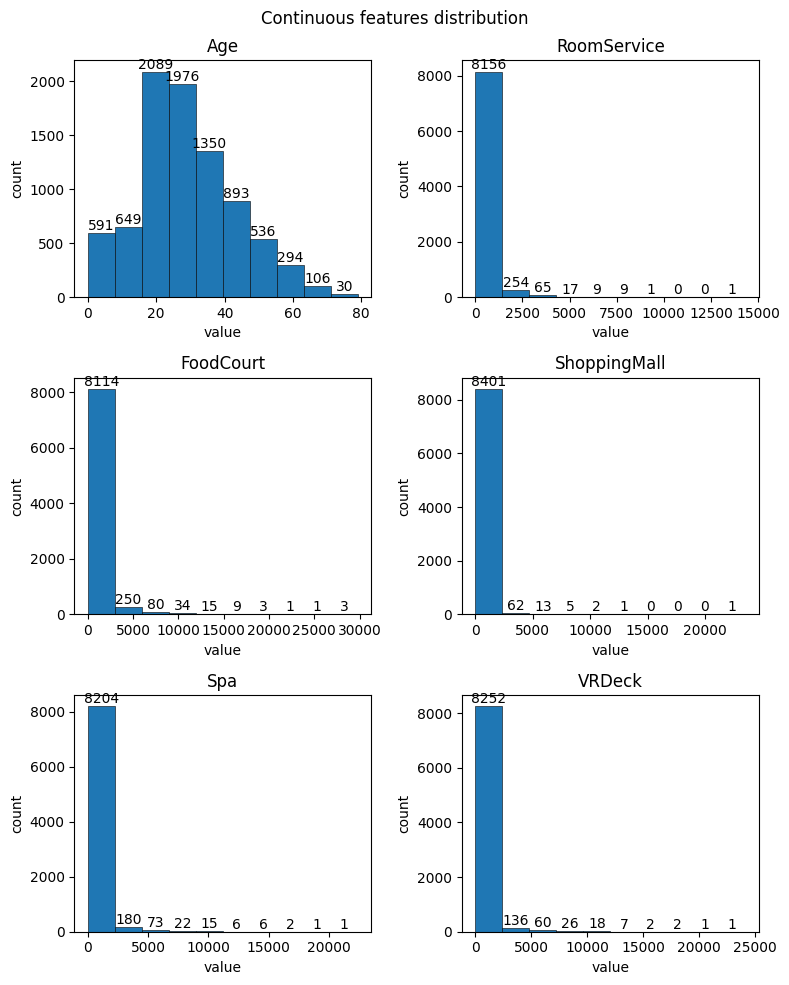

In [217]:
ax = df.loc[:, cont_features].hist(figsize=(8, 10), grid=False, edgecolor='black', linewidth=.4)
for row in ax:
  for col in row:
    for i in col.containers:
      col.bar_label(i)
      col.set_xlabel("value")
      col.set_ylabel("count")

plt.suptitle("Continuous features distribution")
plt.tight_layout()
plt.show()

💡 Схоже, що більшість пасажирів не користувалися послугами класу люкс: усі графіки зручностей класу люкс сильно перекошені вліво.

In [218]:
# Давайте створимо двійкові ознаки для цих сервісів: користувався пасажир послугою чи ні
services_features = cont_features[1:]
for feature in services_features:
  df[f'used_{feature}'] = df[feature].apply(lambda x: 1 if x > 0 else 0)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,used_RoomService,used_FoodCourt,used_ShoppingMall,used_Spa,used_VRDeck
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0,0,0,0
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1,1,1,1
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,1,0,1,1
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,1,1,1
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1,1,1,1


In [219]:
df.loc[:, cont_features + ['CryoSleep', 'VIP', target]].corr().style.background_gradient()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.074273,0.092819,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.252396,0.058785,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,-0.211510,0.129799,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,-0.212514,0.018295,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.203991,0.061059,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.198857,0.125974,-0.207075
CryoSleep,-0.074273,-0.252396,-0.211510,-0.212514,-0.203991,-0.198857,1.000000,-0.081402,0.468645
VIP,0.092819,0.058785,0.129799,0.018295,0.061059,0.125974,-0.081402,1.000000,-0.037650
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,0.468645,-0.037650,1.000000


In [220]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy='median')
imputer.fit(df[imputer_cols])
df[imputer_cols] = imputer.transform(df[imputer_cols])

In [221]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,used_RoomService,used_FoodCourt,used_ShoppingMall,used_Spa,used_VRDeck
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0,0,0,0
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1,1,1,1
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,1,0,1,1
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,1,1,1
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1,1,1,1


In [222]:
# Оскільки змінні HomePlanet і Destination є категоріальними, замінимо пропущені значення на фіктивне значення (dummy value).

df['HomePlanet'].fillna('Gallifrey', inplace=True)
df['Destination'].fillna('Skaro', inplace=True)

In [223]:
df['CryoSleep_is_missing'] = df['CryoSleep'].isna().astype(int)
df['VIP_is_missing'] = df['VIP'].isna().astype(int)

In [224]:
display(df['CryoSleep'].value_counts())
display(df['VIP'].value_counts())

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

VIP
False    8291
True      199
Name: count, dtype: int64

In [225]:
df['CryoSleep'].fillna(False, inplace=True)
df['VIP'].fillna(False, inplace=True)

In [226]:
dummies = pd.get_dummies(df.loc[:, ['HomePlanet', 'Destination']], dtype=int)
dummies

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Gallifrey,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_Skaro,Destination_TRAPPIST-1e
PassengerId,,,,,,,,
0001_01,0,1,0,0,0,0,0,1
0002_01,1,0,0,0,0,0,0,1
0003_01,0,1,0,0,0,0,0,1
0003_02,0,1,0,0,0,0,0,1
0004_01,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
9276_01,0,1,0,0,1,0,0,0
9278_01,1,0,0,0,0,1,0,0
9279_01,1,0,0,0,0,0,0,1


In [227]:
df = pd.concat([df, dummies], axis=1)
df.drop(columns=['HomePlanet', 'Destination'], inplace=True)
df[target] = df[target].astype(int)

In [228]:
df.drop(["Name" ,"Cabin"], axis=1, inplace = True)

In [229]:
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,used_RoomService,...,CryoSleep_is_missing,VIP_is_missing,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Gallifrey,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_Skaro,Destination_TRAPPIST-1e
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,1,1,...,0,0,1,0,0,0,0,0,0,1
0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,1,...,0,0,0,1,0,0,0,0,0,1
0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,0,...,0,0,0,1,0,0,0,0,0,1
0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,1,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0,0,...,0,0,0,1,0,0,1,0,0,0
9278_01,True,18.0,False,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,1,0,0
9279_01,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [230]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size =0.33, stratify=y)

In [231]:
X_train = X_train.to_numpy().astype(np.float32)
X_test = X_test.to_numpy().astype(np.float32)
y_train = y_train.to_numpy().astype(np.float32)
y_test = y_test.to_numpy().astype(np.float32)

### Manually

In [232]:
def initialize_weights_and_bias(dimension):
    # dimension - number of input features
    w = np.full((dimension,1),0.01)
    b = 0.1
    return w, b

In [233]:
def sigmoid(z):
  y_head = 1/(1+np.exp(-z))
  return y_head

In [234]:
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -1*y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost

In [235]:
# In backward propagation we will use y_head that found in forward propagation
# Therefore instead of writing the backward propagation method, let's combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train, eps=1e-5):

    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -1*y_train*np.log(y_head+eps)-(1-y_train)*np.log(1-y_head+eps)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling

    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost, gradients


In [236]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    index = []

    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        index.append(i)

        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]

    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list)
    plt.xticks(range(0, len(index), 5))
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [237]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [238]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))


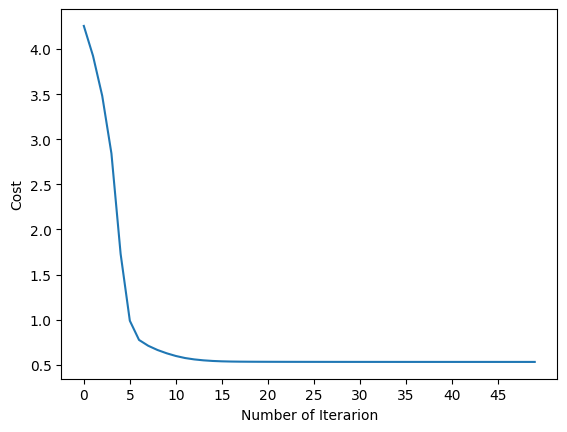

train accuracy: 77.73008241758242 %
test accuracy: 79.0867898222377 %


In [239]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.00001,num_iterations = 50)

### PyTorch

In [240]:
import torch
from torch import nn
import torch.optim as optim
from sklearn.metrics import accuracy_score


In [242]:
# Convert numpy arrays to PyTorch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

In [243]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

In [244]:
input_dim = X_train_t.shape[1]
model = LogisticRegression(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
# optimizer = optim.Adam(model.parameters(), lr=0.001)
model.parameters()

<generator object Module.parameters at 0x000001B98B653A00>

In [251]:
# Train the model
# %%time
num_epochs = 50
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_t)
    loss = criterion(outputs.squeeze(), y_train_t)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [5/50], Loss: 13.1026
Epoch [10/50], Loss: 12.1555
Epoch [15/50], Loss: 11.0804
Epoch [20/50], Loss: 10.6060
Epoch [25/50], Loss: 9.3343
Epoch [30/50], Loss: 8.8197
Epoch [35/50], Loss: 12.7448
Epoch [40/50], Loss: 9.4041
Epoch [45/50], Loss: 8.4283
Epoch [50/50], Loss: 12.8138


In [252]:
# Test the model
with torch.no_grad():
    y_pred = model(X_test_t).squeeze().numpy().round()

accuracy_score(y_test, y_pred)

0.7835482746601603